<a href="https://colab.research.google.com/github/gustavoramos82/Classificando-Imagem-de-Ursos/blob/main/Reconhecimento_Ursos_Extra%C3%A7%C3%A3o_de_carcteristicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconhecimento Ursos

Neste dataset extraido do kaggle (link disponivel [aqui](https://www.kaggle.com/datasets/hoturam/bear-dataset)) vamos usar técnica de redes neurais para fazer reconhecimento das imagens, usando extração de caracteristicas e depois usando o fine tunnig para tentar melhorar a perfomace do modelo.

o dataset consiste em identificar cinco tipos de urso
polar, grizzly, black, panda, and teddy (urso de pelucia)

In [66]:
# Importando as bibliotecas
import os
from PIL import Image
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.applications import vgg19,resnet50,InceptionResNetV2
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
# Pegando o diretorio da pasta de cada classifcador
polar = os.listdir('/content/drive/MyDrive/Datasets/Dataset Ursos/polar')
black = os.listdir('/content/drive/MyDrive/Datasets/Dataset Ursos/black')
teddy = os.listdir('/content/drive/MyDrive/Datasets/Dataset Ursos/teddy')
panda = os.listdir('/content/drive/MyDrive/Datasets/Dataset Ursos/panda')
grizzly = os.listdir('/content/drive/MyDrive/Datasets/Dataset Ursos/grizzly')

Text(0, 0.5, 'Espécie')

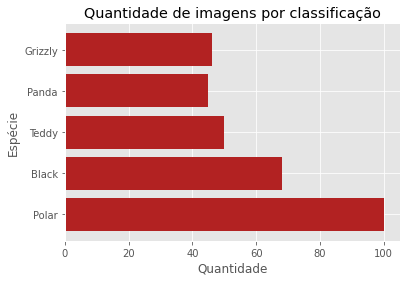

In [9]:
quantidade = [len(polar),len(black),len(teddy),len(panda),len(grizzly)]
nome_especie = ['Polar','Black','Teddy','Panda','Grizzly']

# Montando o grafico
plt.style.use('ggplot')
plt.title('Quantidade de imagens por classificação')
plt.barh(nome_especie,quantidade,color='firebrick')
plt.xlabel('Quantidade')
plt.ylabel('Espécie')

Podemos ver q temos mais imagem de urso pola, em torno de 100, em quanto grizzly, teddy e panda em torno de 40, no primeiro momento não sera feito algo para esse desbalanceamento para forma um baseline e parti dai verificar se alcançamos uma melhor perfomace.

In [10]:
# fazendo a extração das imagens
x = []
y = []
img_w, img_h = 224, 224

In [11]:
for i in polar:
  image = Image.open(f'/content/drive/MyDrive/Datasets/Dataset Ursos/polar/{i}').convert('RGB')
  image = image.resize((img_w, img_h))
  x.append(np.asarray(image))
  y.append(0)

In [12]:
for i in black:
  image = Image.open(f'/content/drive/MyDrive/Datasets/Dataset Ursos/black/{i}').convert('RGB')
  image = image.resize((img_w, img_h))
  x.append(np.asarray(image))
  y.append(1)

In [13]:
for i in teddy:
  image = Image.open(f'/content/drive/MyDrive/Datasets/Dataset Ursos/teddy/{i}').convert('RGB')
  image = image.resize((img_w, img_h))
  x.append(np.asarray(image))
  y.append(2)

In [14]:
for i in panda:
  image = Image.open(f'/content/drive/MyDrive/Datasets/Dataset Ursos/panda/{i}').convert('RGB')
  image = image.resize((img_w, img_h))
  x.append(np.asarray(image))
  y.append(3)

In [15]:
for i in grizzly:
  image = Image.open(f'/content/drive/MyDrive/Datasets/Dataset Ursos/grizzly/{i}').convert('RGB')
  image = image.resize((img_w, img_h))
  x.append(np.asarray(image))
  y.append(4)

In [16]:
x = np.asarray(x)
x = x.astype('float32')
x /= 255
y = np.asarray(y)

In [17]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.2,random_state=10)

Implantando a extração de caracteristicas

In [67]:
# model = vgg19.VGG19(include_top=True, weights='imagenet', input_shape=(224, 224, 3),classes=1000, classifier_activation='softmax')
# model = resnet50.ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=True,classifier_activation='softmax')
model = InceptionResNetV2(input_shape=(224, 224, 3), weights='imagenet', include_top=False,classifier_activation='relu')
model = Model(inputs=model.input, outputs=model.get_layer(index=-2).output)

219070464/219055592 [==============================] - 2s 0us/step


In [68]:
prediction = np.array(model.predict(x_treino))
Xtrain = np.reshape(prediction, (prediction.shape[0], 
         np.prod(prediction.shape[1:])))

In [69]:
prediction = np.array(model.predict(x_teste))
Xtest = np.reshape(prediction, (prediction.shape[0], 
         np.prod(prediction.shape[1:])))

In [70]:
# Aplicando naive bayes
naive = GaussianNB()
naive.fit(Xtrain,y_treino)
y_na_pred = naive.predict(Xtest)

In [71]:
print('Acuracia',accuracy_score(y_teste,y_na_pred))
print('Precisão',precision_score(y_teste,y_na_pred,average='macro'))
print('Recall',recall_score(y_teste,y_na_pred,average='macro'))

Acuracia 0.9354838709677419
Precisão 0.9125
Recall 0.9466666666666667


In [72]:
# Aplicando Árvore de Decisão
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(Xtrain,y_treino)
y_tree_pred = tree.predict(Xtest)

In [73]:
print('Acuracia',accuracy_score(y_teste,y_tree_pred))
print('Precisão',precision_score(y_teste,y_tree_pred,average='macro'))
print('Recall',recall_score(y_teste,y_tree_pred,average='macro'))

Acuracia 0.8870967741935484
Precisão 0.8678296703296704
Recall 0.9068002585649644


In [74]:
# Aplicando Random Forest
rf = RandomForestClassifier(criterion='entropy')
rf.fit(Xtrain,y_treino)
y_rf = rf.predict(Xtest)

In [75]:
print('Acuracia',accuracy_score(y_teste,y_rf))
print('Precisão',precision_score(y_teste,y_rf,average='macro'))
print('Recall',recall_score(y_teste,y_rf,average='macro'))

Acuracia 0.9516129032258065
Precisão 0.9235042735042736
Recall 0.9579487179487179


In [76]:
# Aplicando Gradiente Boosting
grad = GradientBoostingClassifier()
grad.fit(Xtrain,y_treino)
y_grad = grad.predict(Xtest)

In [77]:
print('Acuracia',accuracy_score(y_teste,y_grad))
print('Precisão',precision_score(y_teste,y_grad,average='macro'))
print('Recall',recall_score(y_teste,y_grad,average='macro'))

Acuracia 0.9032258064516129
Precisão 0.9292307692307691
Recall 0.9165136823960353


In [78]:
# Svm com kernel linear
svm = SVC(kernel='linear')
svm.fit(Xtrain,y_treino)
y_svm = svm.predict(Xtest)

In [79]:
print('Acuracia',accuracy_score(y_teste,y_svm))
print('Precisão',precision_score(y_teste,y_svm,average='macro'))
print('Recall',recall_score(y_teste,y_svm,average='macro'))

Acuracia 0.967741935483871
Precisão 0.9733333333333334
Recall 0.9733333333333334


In [80]:
# Usando KNN
knn = KNeighborsClassifier()
knn.fit(Xtrain,y_treino)
y_knn = knn.predict(Xtest)

In [81]:
print('Acuracia',accuracy_score(y_teste,y_knn))
print('Precisão',precision_score(y_teste,y_knn,average='macro'))
print('Recall',recall_score(y_teste,y_knn,average='macro'))

Acuracia 0.9838709677419355
Precisão 0.9857142857142858
Recall 0.9866666666666667


Podemos ver q o melhor base foi a rede *InceptionResNetV2* , apartir disso o modelo que teve a melhor performace foi o KNN com uma acuracia de 98,3%